Import the necessary packages

In [ ]:
# Importing the necessary packages
from skimage.metrics import structural_similarity
import imutils                                    # basic image processing functions 
import cv2
import numpy as np

In [ ]:
image_one = cv2.imread("C:/A Drive/Project/Img/spot diff/c/ex17/a.jpg")           # Import original image
image_two = cv2.imread("C:/A Drive/Project/Img/spot diff/c/ex17/d.jpg")           # Import Image which as diff

# Reduce original size so that could fit screen

# image_one  
scale_percent = 10 # percent of original size
width = int(image_one.shape[1] * scale_percent / 100)
height = int(image_one.shape[0] * scale_percent / 100)
dim1 = (width, height)
 
# image_two

scale_percent = 10 # percent of original size
width = int(image_one.shape[1] * scale_percent / 100)
height = int(image_one.shape[0] * scale_percent / 100)
dim2 = (width, height)

# # # resize image
image_one = cv2.resize(image_one, dim1, interpolation = cv2.INTER_AREA)
image_two = cv2.resize(image_two, dim2, interpolation = cv2.INTER_AREA)


gray1 = cv2.cvtColor(image_one, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image_two, cv2.COLOR_BGR2GRAY)

# Above step
we importing the two images then reducing the size so that it could fit on screen. 
We will reduce it to 90% of its original size so that it could fit the screen.
cv2.INTER_AREA which is use to resize the image

Where we convert Image to grey scale for easy computation
cv2.COLOR_BGR2GRAY: BGR image is converted to RGB.

In [ ]:
# compute the structure similarity Index (SSIM) between the two
# image, ensuring that the difference image is returned
(score, diff) = structural_similarity(gray1,gray2, full= True)  # full true
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9932928502514333


# Above step
In this Above we calculate Structural similarity function where we can pass two images, 
 full= True:  Whatever the difference it is will show back as Image.
 diff * 255: Since it will be floating point it will be multiply by 255.
 . astype(uint8): To Change it to unsign integer 8.

In [ ]:
# threshold the difference image 
# find contours to get the regions of the teo input image that differ

thresh = cv2.threshold(diff, 0, 255,            # Thresholding is egmentation techniques in computer vision and it allows us to separate the foreground from the background of the image.
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]  
 
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,    #  it returns only extreme outer flags. All child contours are left behind 
    cv2. CHAIN_APPROX_SIMPLE)                               # It removes all redundant points and compresses the contour, thereby saving memory.
cnts = imutils.grab_contours(cnts)

# Above step
In this Above we will threshold the difference that the difference you have got and find the contours into difference images. 
This will give us the region where two input images Differ. 
Threshold will separate the difference from background image and display it.

In this step we will take copy of threshold to the threshold we have passed in diff image. 
The diff image comes from structure similarity function. 
 cv2.CHAIN_APPROX_SIMPLE: It removes all redundant points and compresses the  contour, thereby saving memory.
cv2.RETR_EXTERNAL :  Obtains just the outermost outlines
  cnts = imutils.grab_contours(cnts) will grab the contours for us.

In [ ]:
# loop over the contours
no_of_differences = 0
for c in cnts:
    # compute the bounding box of the contour and then draw the 
    # bounding box on both input images to represent whrere the two
    # images differ
    (x,y,w,h) = cv2.boundingRect(c)
    rect_area = w*h
    if rect_area > 80:
        no_of_differences += 1
        #if no_of_differences < 8:
        cv2.rectangle(image_one, (x,y), (x + w, y+ h), (0,255,0), 2)
        cv2.rectangle(image_two, (x,y), (x + w, y+ h), (0,0,255), 2)
        cv2.rectangle(diff, (x,y), (x + w, y+ h), (0,0,255), 2)
print("No of Missing Part =" , no_of_differences)

# show the output

cv2.imshow("Original", image_one)
cv2.imshow("Error", image_two)
cv2.imshow("Diff image", diff)
cv2.waitKey(0)

No of Missing Part = 1


-1

Here we loop over the contours from, for each contours we will get a bounding Rectangle. We will check area of rectangle. 
If area of rectangle is small will be ignore otherwise will show as difference.

# Result 
Run the code with two Images, Image one with the Actual images and image two with the images which wanted to 
Check if there is error or not. 
The Result of output as follows


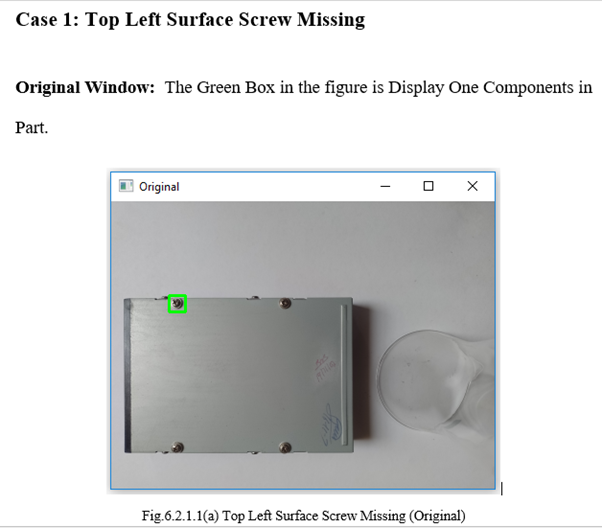

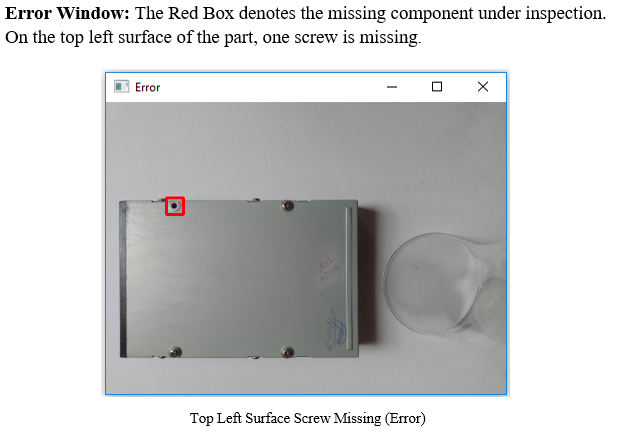

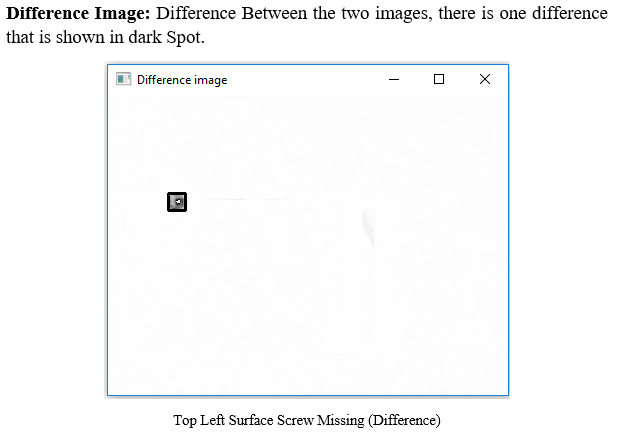

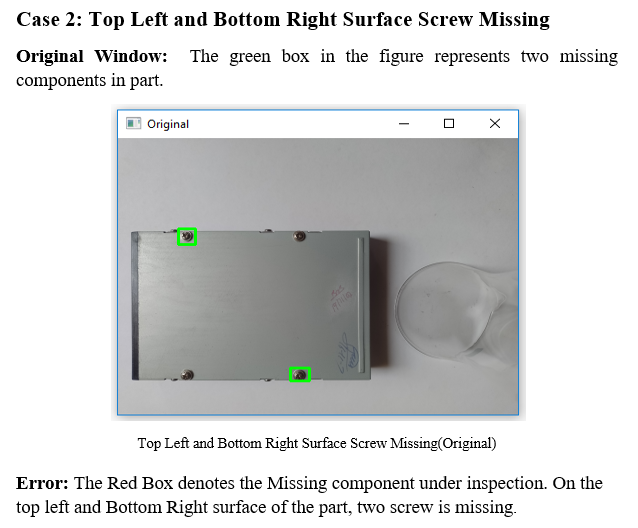

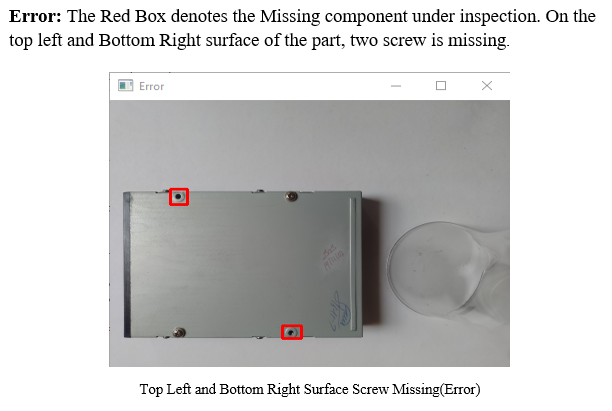

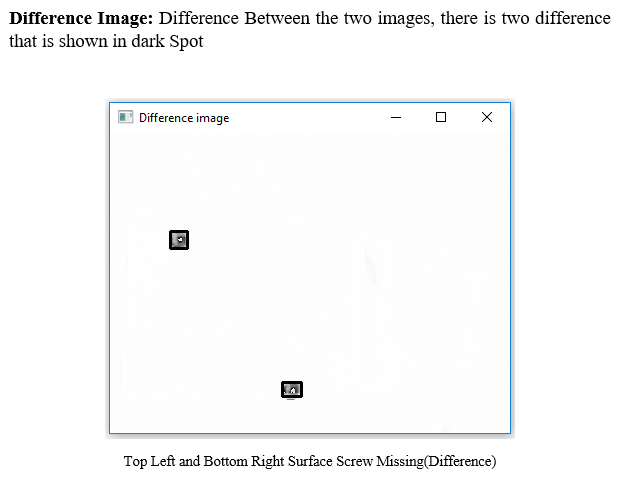

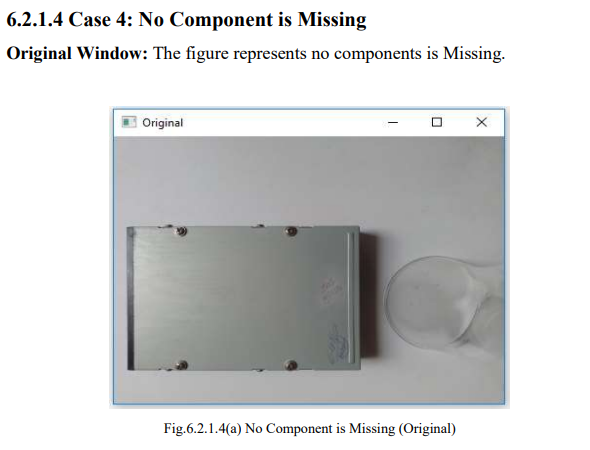

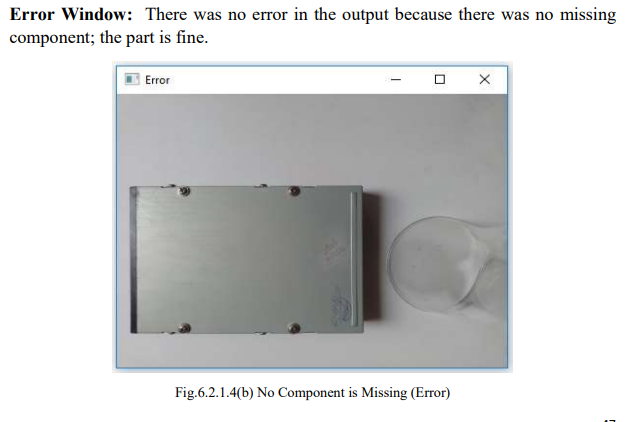

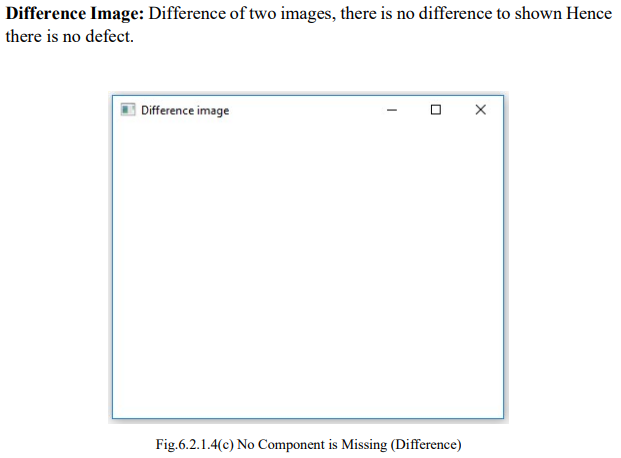

# Conclusion 

We were able to Build and develop Model to detect Error and Mistake in 
Assemble Part.

* The model is accurate which will detect Missing Components in Complex 
  Assemble Part. 

* This model will reduce time required for Sensor based Error Proofing 
  Machine which required loading and unloading of Finished Part. 

* This Model to Detect Human Mistake and correct them as all market are 
  oriented to Zero defect to avoid wrong quality of product reach the customer. 

* This model that can detect Fault in any assemble part. 

* This model that can improve performance and Quality of manufacturing 
 industry.

# References

Research Paper
* Image Quality Assessment: From Error Visibility to
  Structural Similarity.

* Poka Yoke Meets Deep Learning: A Proof of Concept for an Assembly Line 
 Application Matteo Martinelli University of Modena and Reggio Emilia      Department of Pharmaceutical Science.


https://www.youtube.com/watch?v=MeybrIbM0N4

